In [22]:
# (@v1.5) pkg> add Flux@v0.12.2

In [23]:
using Flux, Images, MLDatasets, Plots
using Flux: crossentropy, onecold, onehotbatch, train!
using LinearAlgebra, Random, Statistics

In [99]:
using Flux.Losses: logitcrossentropy

In [24]:
r = rand(Int8, 3,4,2);
Flux.flatten(r)

12×2 Array{Int8,2}:
   49   -67
   47   -54
  105    -8
  102  -127
  -94  -102
  -70    89
   84   -79
   49   114
   -1  -104
 -121  -120
  -70   -80
   71   -98

In [25]:
X_train_raw, y_train_raw = MLDatasets.MNIST.traindata(Float32)
X_test_raw, y_test_raw = MLDatasets.MNIST.testdata(Float32)

(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [26]:
index = 1
img = X_train_raw[:, :, index]

28×28 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0        0.0  0.0  0.0
 

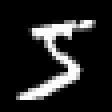

In [27]:
colorview(Gray, img')

In [28]:
y_train_raw
y_train_raw[index]

5

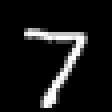

In [29]:
X_test_raw
img = X_test_raw[:, :, index]
colorview(Gray, img')

In [30]:
y_test_raw
y_test_raw[index]

7

In [31]:
X_train = Flux.flatten(X_train_raw)
X_test = Flux.flatten(X_test_raw)

784×10000 Array{Float32,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [32]:
y_train = onehotbatch(y_train_raw, 0:9)
y_test = onehotbatch(y_test_raw, 0:9);

In [33]:
# model architecture proposed/defined
model = Chain(
    Dense(28 * 28, 32, relu),
    Dense(32, 10),
    softmax
)

Chain(Dense(784, 32, relu), Dense(32, 10), softmax)

In [34]:
# define loss function
loss(x, y) = crossentropy(model(x), y)

loss (generic function with 1 method)

In [36]:
ps = params(model)

Params([Float32[-0.08493947 -0.019155134 … -0.074220344 -0.045250878; 0.014019013 -0.0713601 … -0.032250006 -0.07874289; … ; 0.06285887 0.069193885 … -0.030540891 0.018342374; 0.07480435 0.056061946 … -0.031309124 0.04253288], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.20388281 0.08625544 … 0.24114476 -0.15277174; -0.2518291 0.23824814 … 0.12989771 -0.03724978; … ; -0.14088014 -0.25729135 … 0.111247495 -0.29017195; 0.19009541 0.05518359 … -0.13898505 0.03264794], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

In [37]:
learning_rate = 0.01
opt = ADAM(learning_rate)

ADAM(0.01, (0.9, 0.999), IdDict{Any,Any}())

In [39]:
loss_history = []
epochs = 50

for epoch in 1:epochs
    # train model
    train!(loss, ps, [(X_train, y_train)], opt)
    # print report
    train_loss = loss(X_train, y_train)
    push!(loss_history, train_loss)
    println("Epoch = $epoch : Training Loss = $train_loss")
end

Epoch = 1 : Training Loss = 0.039923046
Epoch = 2 : Training Loss = 0.039828427
Epoch = 3 : Training Loss = 0.039629765
Epoch = 4 : Training Loss = 0.039438467
Epoch = 5 : Training Loss = 0.03921016
Epoch = 6 : Training Loss = 0.039036643
Epoch = 7 : Training Loss = 0.03889132
Epoch = 8 : Training Loss = 0.03880948
Epoch = 9 : Training Loss = 0.038777534
Epoch = 10 : Training Loss = 0.038718946
Epoch = 11 : Training Loss = 0.038700115
Epoch = 12 : Training Loss = 0.038628157
Epoch = 13 : Training Loss = 0.038521156
Epoch = 14 : Training Loss = 0.038305853
Epoch = 15 : Training Loss = 0.03809795
Epoch = 16 : Training Loss = 0.03793491
Epoch = 17 : Training Loss = 0.037826378
Epoch = 18 : Training Loss = 0.03772157
Epoch = 19 : Training Loss = 0.037621547
Epoch = 20 : Training Loss = 0.037558727
Epoch = 21 : Training Loss = 0.03747565
Epoch = 22 : Training Loss = 0.037399318
Epoch = 23 : Training Loss = 0.037298404
Epoch = 24 : Training Loss = 0.037184548
Epoch = 25 : Training Loss = 0.0

In [40]:
y_hat_raw = model(X_test)
y_hat = onecold(y_hat_raw) .- 1
y = y_test_raw
mean(y_hat .== y)

0.9616

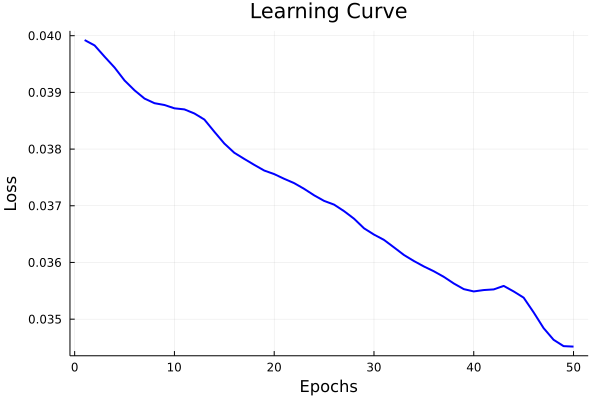

In [42]:
p_l_curve = plot(1:epochs, loss_history, xlabel = "Epochs", ylabel = "Loss", title = "Learning Curve", 
    legend = false, color = :blue, linewidth = 2)

In [54]:
using Flux: flatten

In [78]:
using Flux.Data: DataLoader

In [82]:
function get_data(args)
    xtrain, ytrain = MLDatasets.MNIST.traindata(Float32)
    xtest, ytest = MLDatasets.MNIST.testdata(Float32)

    xtrain = reshape(xtrain, 28, 28, 1, :)
    xtest = reshape(xtest, 28, 28, 1, :)

    ytrain, ytest = onehotbatch(ytrain, 0:9), onehotbatch(ytest, 0:9)

    train_loader = DataLoader((xtrain, ytrain), batchsize=args.batchsize, shuffle=true)
    test_loader = DataLoader((xtest, ytest),  batchsize=args.batchsize)
    
    return train_loader, test_loader
end

get_data (generic function with 1 method)

In [83]:
function LeNet5(; imgsize=(28,28,1), nclasses=10) 
    out_conv_size = (imgsize[1]÷4 - 3, imgsize[2]÷4 - 3, 16)
    
    return Chain(
            Conv((5, 5), imgsize[end]=>6, relu),
            MaxPool((2, 2)),
            Conv((5, 5), 6=>16, relu),
            MaxPool((2, 2)),
            flatten,
            Dense(prod(out_conv_size), 120, relu), 
            Dense(120, 84, relu), 
            Dense(84, nclasses)
          )
end

LeNet5 (generic function with 1 method)

In [84]:
loss(ŷ, y) = logitcrossentropy(ŷ, y)

loss (generic function with 1 method)

In [85]:
function eval_loss_accuracy(loader, model, device)
    l = 0f0
    acc = 0
    ntot = 0
    for (x, y) in loader
        x, y = x |> device, y |> device
        ŷ = model(x)
        l += loss(ŷ, y) * size(x)[end]        
        acc += sum(onecold(ŷ |> cpu) .== onecold(y |> cpu))
        ntot += size(x)[end]
    end
    return (loss = l/ntot |> round4, acc = acc/ntot*100 |> round4)
end

eval_loss_accuracy (generic function with 1 method)

In [86]:
num_params(model) = sum(length, Flux.params(model)) 
round4(x) = round(x, digits=4)

round4 (generic function with 1 method)

In [106]:
Base.@kwdef mutable struct Args
    η = 3e-4             # learning rate
    λ = 0                # L2 regularizer param, implemented as weight decay
    batchsize = 128      # batch size
    epochs = 4          # number of epochs
    seed = 0             # set seed > 0 for reproducibility
    use_cuda = true      # if true use cuda (if available)
    infotime = 1 	     # report every `infotime` epochs
    checktime = 5        # Save the model every `checktime` epochs. Set to 0 for no checkpoints.
    tblogger = true      # log training with tensorboard
    savepath = "runs/"    # results path
end

Args

In [107]:
using ProgressMeter: @showprogress

In [108]:
using Logging: with_logger

In [109]:
import BSON
using TensorBoardLogger: TBLogger, tb_overwrite, set_step!, set_step_increment!

In [139]:
model = ""
loss_history2 = []

function train(; kws...)
    args = Args(; kws...)
        args.seed > 0 && Random.seed!(args.seed)
    device = cpu
        @info "Training on CPU"

    train_loader, test_loader = get_data(args)
    @info "Dataset MNIST: $(train_loader.nobs) train and $(test_loader.nobs) test examples"

    ## MODEL AND OPTIMIZER
    model = LeNet5() |> device
    @info "LeNet5 model: $(num_params(model)) trainable params"    
    
    ps = Flux.params(model)  

    opt = ADAM(args.η) 
    if args.λ > 0 # add weight decay, equivalent to L2 regularization
        opt = Optimiser(WeightDecay(args.λ), opt)
    end
    
    ## LOGGING UTILITIES
    if args.tblogger 
        tblogger = TBLogger(args.savepath, tb_overwrite)
        set_step_increment!(tblogger, 0) # 0 auto increment since we manually set_step!
        @info "TensorBoard logging at \"$(args.savepath)\""
    end
    
    function report(epoch)
        train = eval_loss_accuracy(train_loader, model, device)
        test = eval_loss_accuracy(test_loader, model, device)   
        
        push!(loss_history2, train.loss)
        
        println("Epoch: $epoch   Train: $(train)   Test: $(test)")
        if args.tblogger
            set_step!(tblogger, epoch)
            with_logger(tblogger) do
                @info "train" loss=train.loss  acc=train.acc
                @info "test"  loss=test.loss   acc=test.acc
            end
        end
    end
    
    ## TRAINING
    @info "Start Training"
    report(0)
    for epoch in 1:args.epochs
        @showprogress for (x, y) in train_loader
            x, y = x |> device, y |> device
            gs = Flux.gradient(ps) do
                    ŷ = model(x)
                    loss(ŷ, y)
                end

            Flux.Optimise.update!(opt, ps, gs)
        end
        
        
        
        ## Printing and logging
        epoch % args.infotime == 0 && report(epoch)
        if args.checktime > 0 && epoch % args.checktime == 0
            !ispath(args.savepath) && mkpath(args.savepath)
            modelpath = joinpath(args.savepath, "model.bson") 
            let model = cpu(model) #return model to cpu before serialization
                BSON.@save modelpath model epoch
            end
            @info "Model saved in \"$(modelpath)\""
        end
    end
    return(model)
end

train (generic function with 1 method)

In [140]:
modelCNN = train()

┌ Info: Training on CPU
└ @ Main In[139]:8
┌ Info: Dataset MNIST: 60000 train and 10000 test examples
└ @ Main In[139]:11
┌ Info: LeNet5 model: 44426 trainable params
└ @ Main In[139]:15
┌ Info: TensorBoard logging at "runs/"
└ @ Main In[139]:28
┌ Info: Start Training
└ @ Main In[139]:48


Epoch: 0   Train: (loss = 2.314f0, acc = 14.44)   Test: (loss = 2.3133f0, acc = 15.49)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:21


Epoch: 1   Train: (loss = 0.1897f0, acc = 94.295)   Test: (loss = 0.1781f0, acc = 94.79)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:21


Epoch: 2   Train: (loss = 0.1163f0, acc = 96.6667)   Test: (loss = 0.1038f0, acc = 96.88)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:19


Epoch: 3   Train: (loss = 0.0879f0, acc = 97.3533)   Test: (loss = 0.0779f0, acc = 97.63)


Progress: 100%|█████████████████████████████████████████| Time: 0:00:17


Epoch: 4   Train: (loss = 0.0689f0, acc = 97.9233)   Test: (loss = 0.0629f0, acc = 98.16)


Chain(Conv((5, 5), 1=>6, relu), MaxPool((2, 2)), Conv((5, 5), 6=>16, relu), MaxPool((2, 2)), flatten, Dense(256, 120, relu), Dense(120, 84, relu), Dense(84, 10))

In [141]:
xtrain, ytrain = MLDatasets.MNIST.traindata(Float32)
xtest, ytest = MLDatasets.MNIST.testdata(Float32)

xtrain = reshape(xtrain, 28, 28, 1, :)
xtest = reshape(xtest, 28, 28, 1, :)

ytrain, ytest = onehotbatch(ytrain, 0:9), onehotbatch(ytest, 0:9)

train_loader = DataLoader((xtrain, ytrain), batchsize=128, shuffle=true)
test_loader = DataLoader((xtest, ytest),  batchsize=128);

In [142]:
y_hat_raw2 = modelCNN(xtest)
y_hat2 = onecold(y_hat_raw2) .- 1
println( size(y_hat2) )
y2 = ytest
y2 = onecold(y2,0:9)
println( size(y2) )
mean(y_hat2 .== y2)

(10000,)
(10000,)


0.9816

In [143]:
loss_history2

5-element Array{Any,1}:
 2.314f0
 0.1897f0
 0.1163f0
 0.0879f0
 0.0689f0

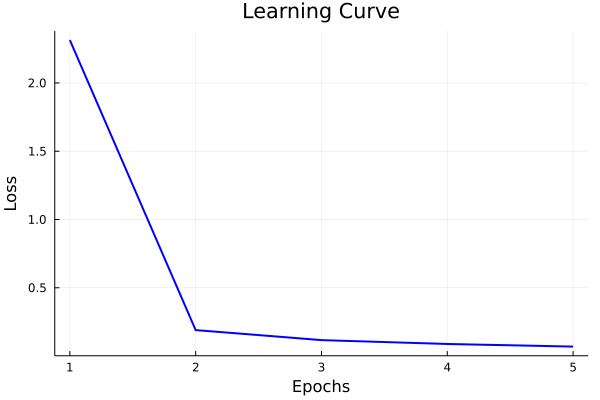

In [144]:
p_l_curve = plot(1:length(loss_history2), loss_history2, xlabel = "Epochs", ylabel = "Loss", title = "Learning Curve", 
    legend = false, color = :blue, linewidth = 2)